<a href="https://colab.research.google.com/github/SushanthJanga/INFO6105-DSE/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

This dataset provides comprehensive information on various laptops, capturing diverse features and specifications. It is a valuable resource for those interested in exploring and predicting laptop prices based on their characteristics.

This dataset offers a comprehensive overview of laptops from leading brands, presenting essential details such as brand, model name, pricing, specification ratings, processor specifications, RAM and storage configurations, GPU details, display characteristics, operating system, and warranty periods. From high-performance gaming rigs featuring dedicated GPUs like the AMD Radeon RX 6500M or the NVIDIA GeForce RTX 4050 to lightweight ultrabooks optimized for portability and everyday tasks, the dataset encompasses a diverse range of laptops tailored to meet various user needs and preferences. Processors from both AMD and Intel, spanning multiple generations, are featured, providing users with a wide array of options to suit their computing requirements, whether for gaming, productivity, or multimedia consumption.

Display sizes vary across the laptops, ranging from compact 13.3-inch screens to larger 15.6-inch displays, with resolutions ensuring crisp visuals for immersive viewing experiences. Operating systems include Windows 11 OS and macOS, catering to users of both Windows and Apple ecosystems. Furthermore, warranty durations provided offer insights into the post-purchase support offered by different brands, aiding consumers in making informed decisions. This dataset serves as a valuable resource for consumers, researchers, and industry analysts alike, facilitating detailed comparisons, trend analysis, and informed decision-making within the dynamic landscape of the laptop market.



# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DSE/94_character_TMNIST.csv')


# Splitting the Inputs and Labels

The list contains a diverse range of unique elements, including uppercase and lowercase letters (A-Z, a-z), digits (0-9), and various symbols such as punctuation marks, mathematical symbols, and special characters. These elements represent a wide array of characters commonly found in text and can be utilized for tasks such as text classification, character recognition, or language modeling. Each element plays a crucial role in representing and understanding textual data, making them valuable components in natural language processing and related applications.

Splitting the data into separate entities is crucial for supervised learning tasks. In supervised learning, the model learns to associate input data with corresponding labels, necessitating clear distinctions between features and targets. This separation enables the dataset to be divided into training and evaluation sets, facilitating effective model training and performance assessment. Additionally, preprocessing steps such as normalization, tokenization, and encoding can be independently applied to inputs and labels to meet their specific requirements. By maintaining this separation, the code remains modular and flexible, allowing for experimentation with different preprocessing techniques and model architectures while mitigating the risk of data leakage. Therefore, splitting inputs and labels is essential for ensuring robust and accurate model development in supervised learning scenarios.

In [ ]:
# Grouping All labels
all_ = list(data['labels'].unique())
print(data['labels'].unique())
num_classes=data['labels'].nunique()
print(num_classes)

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)

# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    data.loc[data['labels'].isin(list_), 'group'] = str(group)
    group += 1

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
94


# Mapping the Values

In [ ]:
# defining X and y for training
X = data.iloc[:, 2:-1].astype('float32')
y  = data[['labels']]

#preping the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary
label_dict_inv = dict(zip(values,labels))

# Mapping
y['labels'].replace(label_dict, inplace=True) #Maping Values

#Checking the mappings
print(label_dict)


{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


# Splitting Into Training and Test Sets

In [ ]:
#splitiing the data into test and train
#we are using stratified sampling in order to get same distribution of classes in train and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42,stratify=y)

Text(0, 0.5, 'Count')

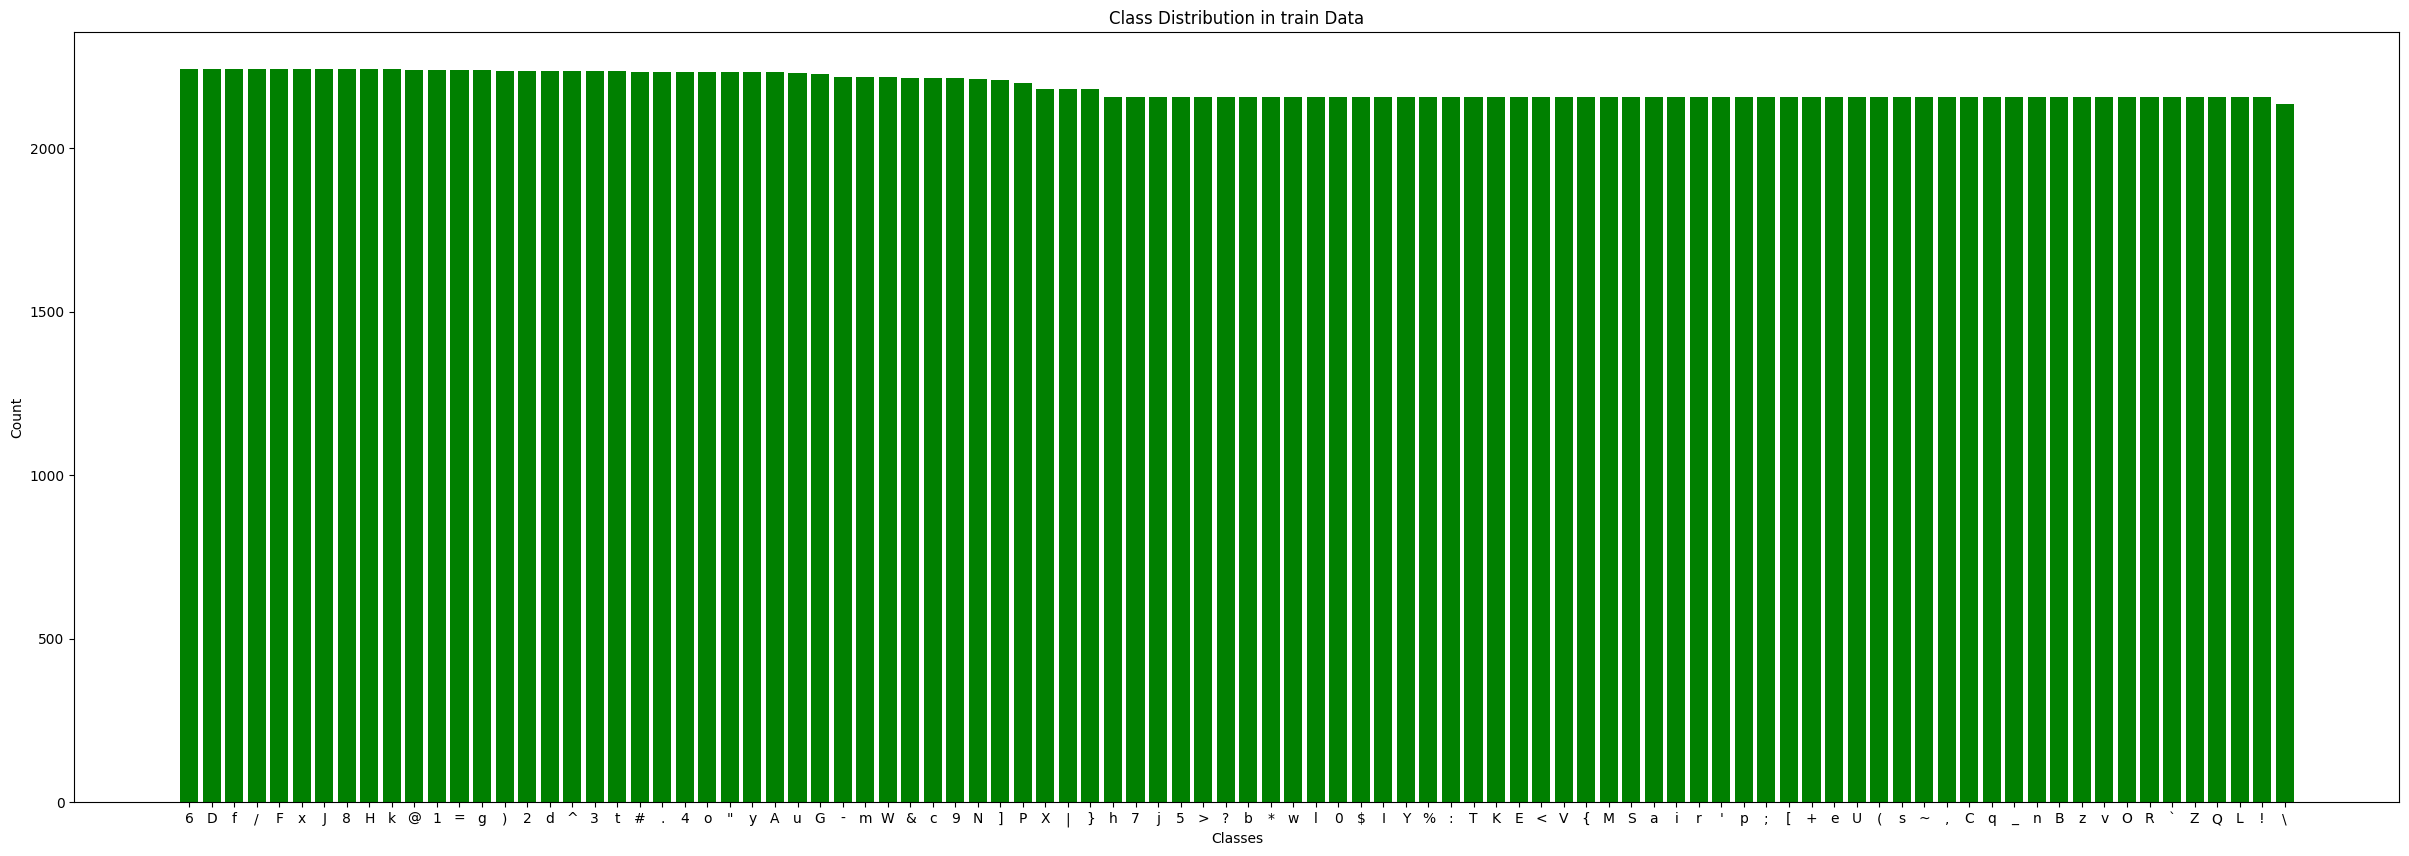

In [ ]:
#checking the distribution of train and test dataset

plt.figure(figsize=(30, 10))
plt.bar(labels,y_train.value_counts(),color='g')
plt.title('Class Distribution in train Data')
plt.xlabel('Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

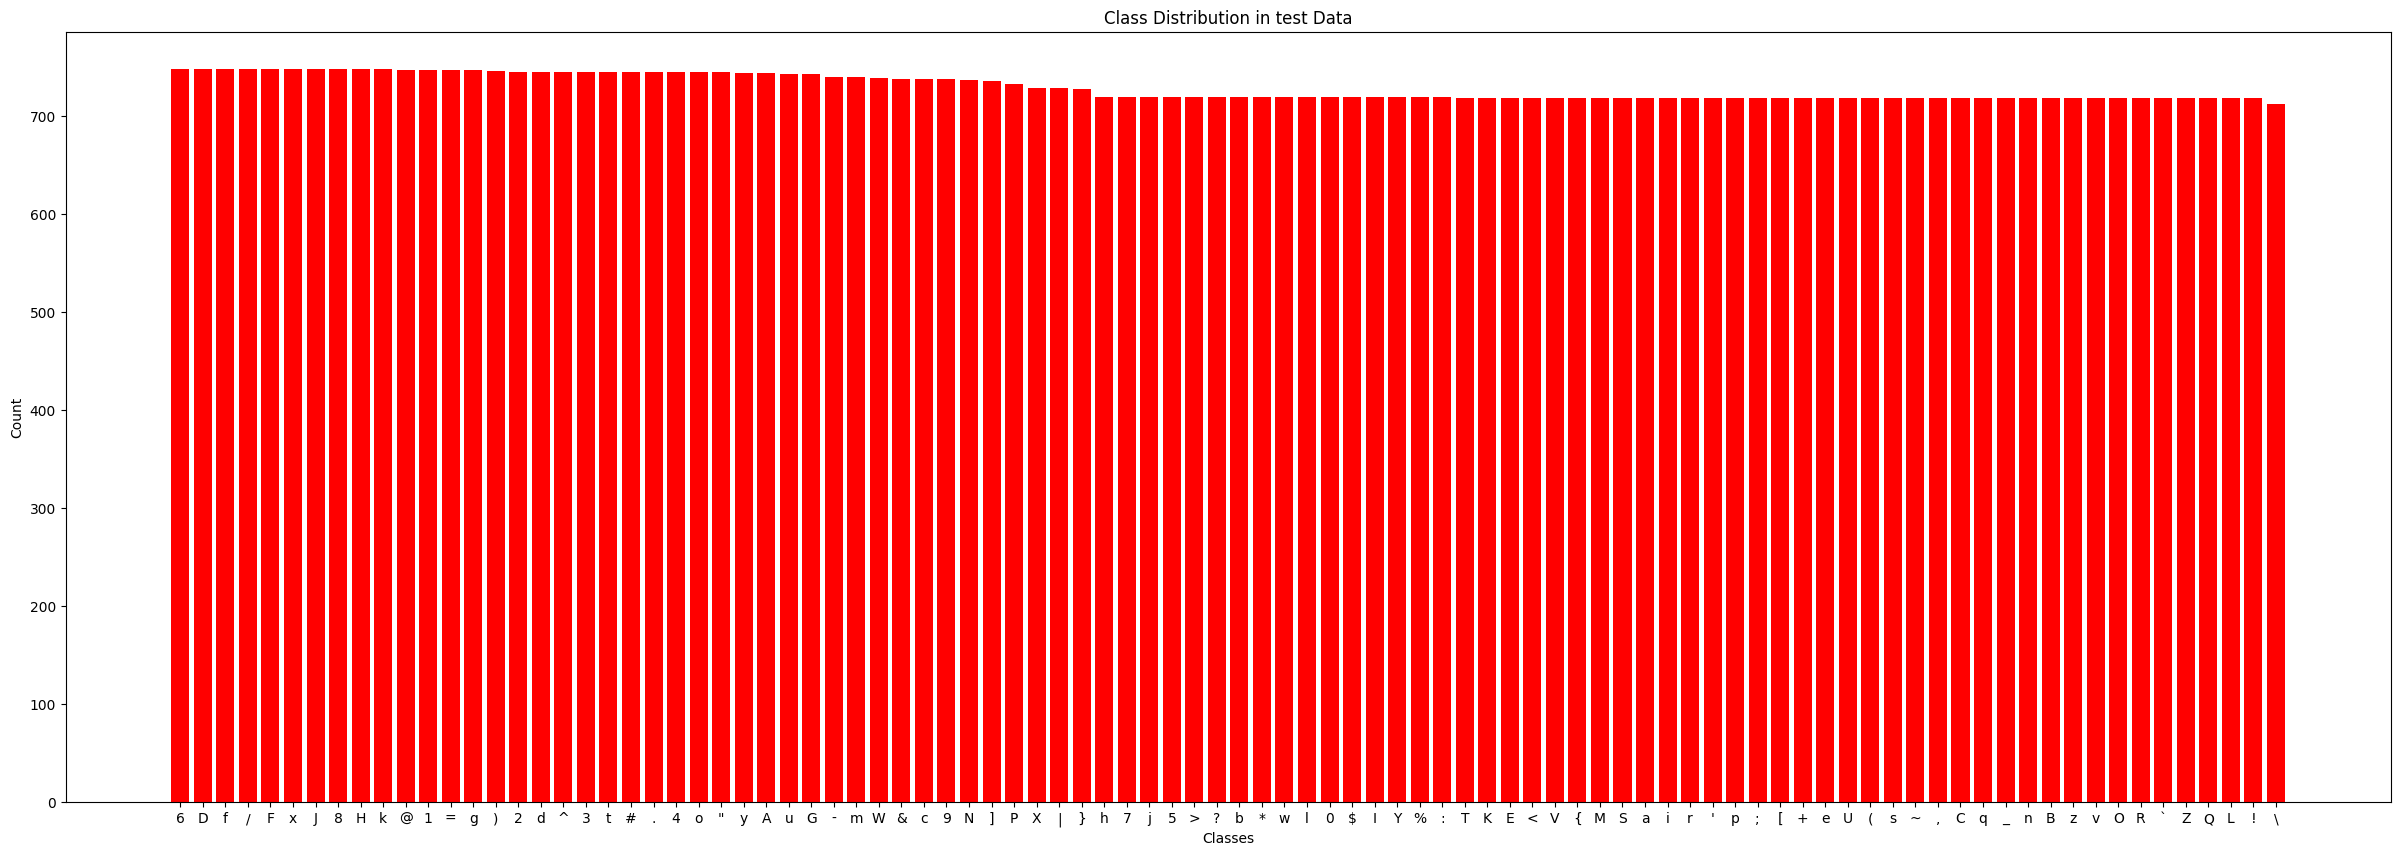

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(labels,y_test.value_counts(),color='r')
plt.title('Class Distribution in test Data')
plt.xlabel('Classes')
plt.ylabel('Count')


- We can clearly see that the distribution of classes is nearly the same in train and test data. All the classes have relatively same number of datapoints in train and test.

# Importing Libraries for Neural Network

In [ ]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Preping The Dataset

In [ ]:
# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height))
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(205569, 28, 28),(68524, 28, 28)
Y:Train, Test data shape:(205569, 94),(68524, 94)


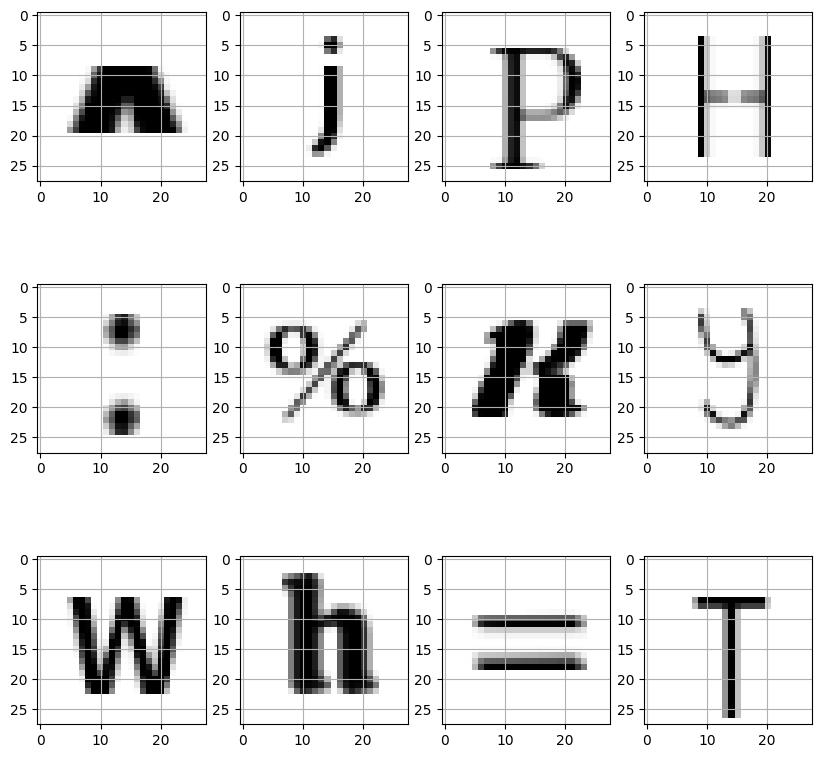

In [ ]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()

# Implementing The CNN model

A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing grid-like data, such as images. It consists of layers that learn to extract features from the input data through convolution operations, capture important information through pooling, introduce non-linearity with activation functions like ReLU, and perform classification or regression tasks with fully connected layers. CNNs are particularly effective for tasks like image classification, object detection, and image segmentation due to their ability to automatically learn hierarchical representations from raw data.

In [ ]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (205569, 28, 28, 1),(68524, 28, 28, 1)


In [ ]:
#since each pixel is a number between 0-1 we will first start with basic Neural Network
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474814 (1.81 MB)
Trainable params: 474814 (1.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#fitting the model
model_history=model.fit(X_train, y_train, epochs=28, validation_data=(X_test, y_test), verbose=2,batch_size=128)

Epoch 1/100
3213/3213 - 634s - loss: 0.6432 - accuracy: 0.8103 - val_loss: 0.3295 - val_accuracy: 0.8909 - 634s/epoch - 197ms/step
Epoch 2/100
3213/3213 - 580s - loss: 0.4034 - accuracy: 0.8763 - val_loss: 0.2846 - val_accuracy: 0.9112 - 580s/epoch - 181ms/step
Epoch 3/100
3213/3213 - 576s - loss: 0.3627 - accuracy: 0.8876 - val_loss: 0.3038 - val_accuracy: 0.9069 - 576s/epoch - 179ms/step
Epoch 4/100
3213/3213 - 572s - loss: 0.3423 - accuracy: 0.8942 - val_loss: 0.2373 - val_accuracy: 0.9257 - 572s/epoch - 178ms/step
Epoch 5/100
3213/3213 - 572s - loss: 0.3255 - accuracy: 0.8978 - val_loss: 0.2308 - val_accuracy: 0.9265 - 572s/epoch - 178ms/step
Epoch 6/100
3213/3213 - 576s - loss: 0.3134 - accuracy: 0.9015 - val_loss: 0.2367 - val_accuracy: 0.9254 - 576s/epoch - 179ms/step
Epoch 7/100
3213/3213 - 576s - loss: 0.3026 - accuracy: 0.9049 - val_loss: 0.2510 - val_accuracy: 0.9180 - 576s/epoch - 179ms/step
Epoch 8/100
3213/3213 - 574s - loss: 0.2988 - accuracy: 0.9063 - val_loss: 0.2226 -

KeyboardInterrupt: 

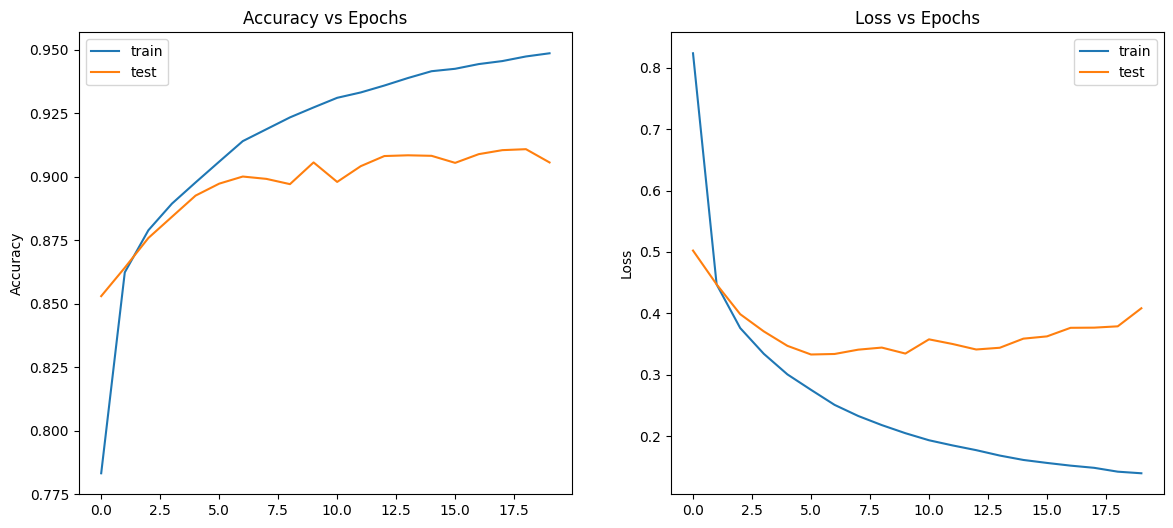

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()